# Breast_Cancer_Survival_Prediction

About Dataset
Breast cancer is a type of cancer that develops in the cells of the breast. It occurs when the cells in the breast grow and divide uncontrollably, forming a mass or lump. Breast cancer can spread to other parts of the body if not detected and treated early.

The dataset contains information on breast cancer patients, including their Patient_ID, Age, Gender, and expression levels of four proteins (Protein1, Protein2, Protein3, Protein4). The dataset also includes the Breast cancer stage of the patient (Tumor_Stage), Histology (type of cancer), ER, PR, and HER2 status, Surgery_type, Date of Surgery, Date of Last Visit, and Patient Status (Alive/Dead).

This information can be used to analyze the relationship between protein expression levels, cancer stage, and patient outcomes. It can also be used to understand the impact of different types of surgeries on patient survival and to identify potential risk factors for breast cancer progression.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('downloads/breast_cancer_survival.csv')
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [5]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [6]:
df.isnull().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [9]:
df.Gender.value_counts()

FEMALE    313
MALE        4
Name: Gender, dtype: int64

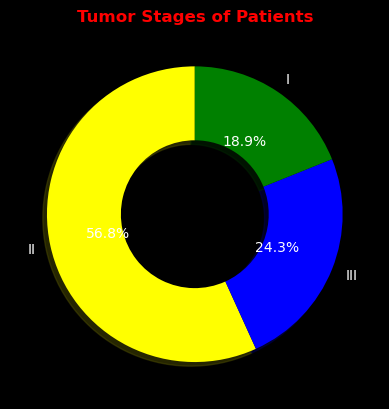

In [10]:
plt.style.use('dark_background')

stage=df['Tumour_Stage'].value_counts()
transactions=stage.index
quantity=stage.values

plt.pie(quantity,labels=transactions, autopct='%1.1f%%', shadow=True,
       startangle=90, wedgeprops={'width':0.5},colors=['yellow','blue','green'])

plt.title('Tumor Stages of Patients', weight='bold',color='red')

plt.show()

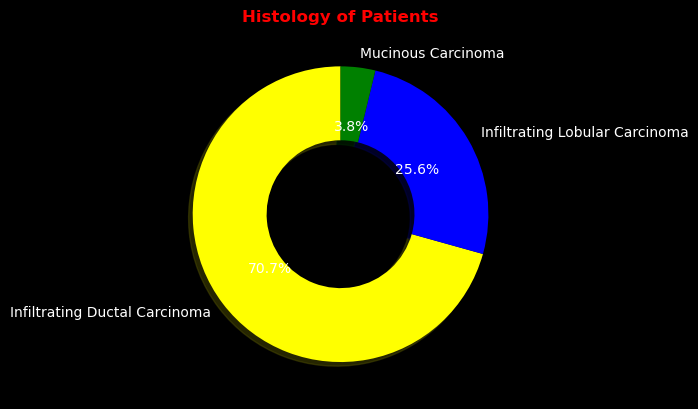

In [11]:
plt.style.use('dark_background')

histology=df['Histology'].value_counts()
transactions=histology.index
quantity=histology.values

plt.pie(quantity,labels=transactions, autopct='%1.1f%%', shadow=True,
       startangle=90, wedgeprops={'width':0.5},colors=['yellow','blue','green'])

plt.title('Histology of Patients', weight='bold',color='red')

plt.show()

In [12]:
# ER Status

print(df['ER status'].value_counts())

#PR Status

print(df['PR status'].value_counts())

#HER2 Status

print(df['HER2 status'].value_counts())

Positive    317
Name: ER status, dtype: int64
Positive    317
Name: PR status, dtype: int64
Negative    288
Positive     29
Name: HER2 status, dtype: int64


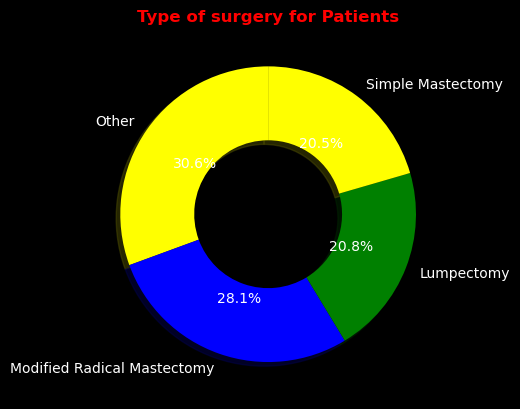

In [13]:
plt.style.use('dark_background')

surgery_type=df['Surgery_type'].value_counts()
transactions=surgery_type.index
quantity=surgery_type.values

plt.pie(quantity,labels=transactions, autopct='%1.1f%%', shadow=True,
       startangle=90, wedgeprops={'width':0.5},colors=['yellow','blue','green'])

plt.title('Type of surgery for Patients', weight='bold',color='red')

plt.show()

# Data Encoding

In [28]:
df.isnull().sum()

Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [27]:
df=df.dropna()

In [14]:
df['Tumour_Stage']=df['Tumour_Stage'].map({'I':1,'II':2,'III':3})
df['Histology']=df['Histology'].map({'Infiltrating Ductal Carcinoma':1,'Infiltrating Lobular Carcinoma':2,
                                     'Mucinous Carcinoma':3})
df['ER status']=df['ER status'].map({'Positive':1})
df['PR status']=df['PR status'].map({'Positive':1})
df['HER2 status']=df['HER2 status'].map({'Positive':1,'Negative':2})
df['Gender']=df['Gender'].map({'MALE':0,'FEMALE':1})
df['Surgery_type']=df['Surgery_type'].map({'Other':1,'Modified RadicalMastectomy':2,
                                          'Lumpectomy':3,'Mastectomy':4})
print(df.head())

   Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0   42       1   0.95256   2.15000  0.007972 -0.048340             2   
1   54       1   0.00000   1.38020 -0.498030 -0.507320             2   
2   63       1  -0.52303   1.76400 -0.370190  0.010815             2   
3   78       1  -0.87618   0.12943 -0.370380  0.132190             1   
4   42       1   0.22611   1.74910 -0.543970 -0.390210             2   

   Histology  ER status  PR status  HER2 status  Surgery_type Date_of_Surgery  \
0          1          1          1            2           1.0       20-May-18   
1          1          1          1            2           1.0       26-Apr-18   
2          1          1          1            2           3.0       24-Aug-18   
3          1          1          1            2           1.0       16-Nov-18   
4          1          1          1            1           3.0       12-Dec-18   

  Date_of_Last_Visit Patient_Status  
0          26-Aug-18          Alive  
1   

# Model Training

In [33]:
X=np.array(df[['Age','Gender','Protein1','Protein2','Protein3','Protein4','Tumour_Stage',
             'Histology','ER status','PR status','HER2 status','Surgery_type']])
y=np.array(df[['Patient_Status']])

In [34]:
X

array([[ 4.2000e+01,  1.0000e+00,  9.5256e-01, ...,  1.0000e+00,
         2.0000e+00,  1.0000e+00],
       [ 5.4000e+01,  1.0000e+00,  0.0000e+00, ...,  1.0000e+00,
         2.0000e+00,  1.0000e+00],
       [ 6.3000e+01,  1.0000e+00, -5.2303e-01, ...,  1.0000e+00,
         2.0000e+00,  3.0000e+00],
       ...,
       [ 6.4000e+01,  1.0000e+00,  9.7580e-01, ...,  1.0000e+00,
         2.0000e+00,  3.0000e+00],
       [ 5.9000e+01,  1.0000e+00,  2.4598e-02, ...,  1.0000e+00,
         1.0000e+00,  3.0000e+00],
       [ 7.4000e+01,  1.0000e+00,  9.7251e-01, ...,  1.0000e+00,
         2.0000e+00,  3.0000e+00]])

In [35]:
y

array([['Alive'],
       ['Dead'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Dead'],
       ['Dead'],
       ['Dead'],
       ['Dead'],
       ['Dead'],
       ['Alive'],
       ['Dead'],
       ['Alive'],
       ['Alive'],
       ['Dead'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Dead'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Dead'],
       ['Dead'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
       ['Alive'],
   

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)

In [38]:
model=SVC()

In [39]:
model.fit(X_train,y_train)

SVC()

In [42]:
y_pred=model.predict(X_test)
y_pred

array(['Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive'], dtype=object)

# Model Accuracy

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[15,  0],
       [ 2,  0]], dtype=int64)

In [47]:
tp=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tn=cm[1][1]

In [48]:
acc=(tp+tn)/(tp+fp+fn+tn)
acc

0.8823529411764706

In [49]:
precision=tp/(tp+fp)
precision

1.0

In [50]:
recall=tp/(tp+fn)
recall

0.8823529411764706

In [51]:
f1score=2*(recall*precision)/(recall+precision)
f1score

0.9375